# Clean up exercise 11/09 2024 by Ahmad Alkaseb

Status of each exercise:
* 28: DONE
* 29: DONE
* 30: DONE
* 31: DONE

In [112]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Load the data into pandas dataframe using pandas library
df = pd.read_csv('weather.csv')

In [57]:
# Convert all ordinal data columns into one-hot encoding data, and remove the first column created.
df_dummies = pd.get_dummies(df, drop_first=True)

In [59]:
# Shuffle all dummies data created, and keep the same random value shuffled.
df_shuffled = shuffle(df_dummies, random_state=42)

In [61]:
# Split the shuffled data into x and y
DV = 'Rain' # Save the rain column as, Dependent Variabel
X = df_shuffled.drop(DV, axis=1) # Remove DV from the x variabel, and remove the columns
y = df_shuffled[DV] # Save DV as y

In [63]:
# Split X and y into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
# Scale X_train and X_test
scaler = StandardScaler() # instantiate StandardScaler model
X_train_scaled = scaler.fit_transform(X_train) # transform X_train to z-scores
X_test_scaled = scaler.transform(X_test) # transform X_test to z-scores

In [42]:
# Instantiate grid
grid = {'C': np.linspace(1, 10, 10),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [46]:
# Unstantiate GridSearchCV model
model = GridSearchCV(SVC(gamma='auto'), grid, scoring='f1', cv=5)

In [48]:
# Fit the gridsearch model
model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [49]:
# Print the best parameters
best_parameters = model.best_params_
print(best_parameters)

{'C': 1.0, 'kernel': 'linear'}


In [89]:
# Specify the hyperparameter space
grid = {'criterion': ['gini', 'entropy'],
        'min_weight_fraction_leaf': np.linspace(0.0, 0.5, 10),
        'min_impurity_decrease': np.linspace(0.0, 1.0, 10),
        'class_weight': [None, 'balanced']}

In [91]:
# Instantiate the GridSearchCV model
model = GridSearchCV(DecisionTreeClassifier(), grid, scoring='f1', cv=5)

In [93]:
# Fit to the training set
model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'min_impurity_decrease': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'min_weight_fraction_leaf': array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ])},
             scoring='f1')

In [94]:
# Print the tuned parameters
best_parameters = model.best_params_
print(best_parameters)

{'class_weight': None, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0}


In [100]:
# Access the 'Tree__criterion' value
print(best_parameters['criterion'])

gini


In [106]:
# Instantiate model
model = DecisionTreeClassifier(class_weight=best_parameters['class_weight'],
                               criterion=best_parameters['criterion'],
                               min_impurity_decrease=best_parameters['min_impurity_decrease'],
                               min_weight_fraction_leaf=best_parameters['min_weight_fraction_leaf'])

In [108]:
# Scale X_train and fit model
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [110]:
# Extract feature_importances attribute
print(model.feature_importances_)

[1. 0. 0. 0. 0. 0. 0. 0.]


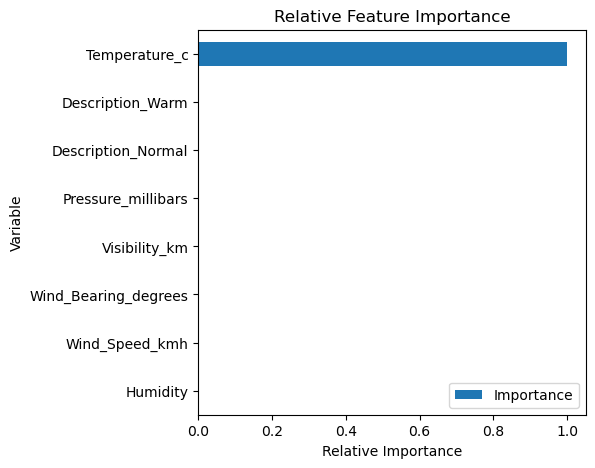

In [116]:
# Plot feature importance in descending order
df_imp = pd.DataFrame({'Importance': list(model.feature_importances_)}, index=X.columns)

# sort dataframe
df_imp_sorted = df_imp.sort_values(by=('Importance'), ascending=True)

# plot these
df_imp_sorted.plot.barh(figsize=(5,5))
plt.title('Relative Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.legend(loc=4)
plt.show()